In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Mouna\Desktop\Masters\Spring2019\Project Work\irma_coded_tweets.csv',dtype='str',encoding='utf-8',error_bad_lines=False,keep_default_na=False)
df['t']=df['tweet'].str.replace('http\S+|www.\S+', '', case=False)
df['t'] = df['t'].str.replace('@', ' ')
df['t'] = df['t'].str.replace('#', ' ')
df['t']=df['t'].str.lower()

In [3]:
from textblob import TextBlob
def split_into_lemmas(message):
    #message=message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]
df['t']=df['t'].apply(split_into_lemmas)

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stop = stopwords.words('english')
stemmer = SnowballStemmer("english")
df['t']=df['t'].apply(lambda x: [item for item in x if item not in stop])
df['t'] = df['t'].apply(lambda x: [stemmer.stem(y) for y in x])
df['len']=df['t'].str.len()
df.drop(df[df['len']<=2].index,inplace=True)
tweets = df['t'].tolist()
tweets = [[i for i in nested if len(i) > 2] for nested in tweets]
df.shape

(17213, 16)

In [4]:
from gensim import corpora, models , similarities
import gensim


from gensim.test.utils import common_corpus, common_dictionary
from gensim.sklearn_api import TfIdfTransformer

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(tweets)

n_items = len(dictionary)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tweets]

# generate tfidf model
model = models.TfidfModel(corpus)

corpus_tfidf = model[corpus]

#model = TfIdfTransformer(dictionary=corpus)

#tfidf_corpus = model.fit_transform(corpus)

#index = similarities.MatrixSimilarity(model[corpus])

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [61]:
print(corpus_tfidf[0])

[(0, 0.34183656337042284), (1, 0.31897361835932703), (2, 0.37015489572520421), (3, 0.39847322807998564), (4, 0.3535897332146985), (5, 0.25562439887948812), (6, 0.16627218141859976), (7, 0.17577259113579874), (8, 0.13367022450760624), (9, 0.21157470270234063), (10, 0.13712847316050483), (11, 0.27608343187549816), (12, 0.19376513787006763), (13, 0.1654468055152862), (14, 0.11883022427985893)]


In [8]:
# making a list of all the corpus
tf_idf_vectors=[]
tfidfdocs = model[corpus]
for doc in tfidfdocs:
    tf_idf_vectors.append((doc))
df["tf_idf_vectors"]=tf_idf_vectors

In [5]:
##converting it to sparce matrix uisng lil_matrix method
from scipy.sparse import lil_matrix
l=[]
M = lil_matrix((17213,19221), dtype=int)
for i,row in enumerate(tf_len):
    #print(i)
    for col in row:
        M[i, col[0]] = col[1]  

NameError: name 'tf_len' is not defined

In [20]:
print(M)

  (324, 1349)	1
  (1219, 1378)	1
  (10569, 1349)	1
  (13491, 587)	1


In [13]:
from scipy import sparse
M1.A.tocsc()

AttributeError: 'numpy.ndarray' object has no attribute 'tocsc'

In [9]:
n_items

16853

In [10]:
#converting it to sparce matrix uisng coo_matrix method
from scipy import sparse
data,col,row = [],[],[]
for i, rr in enumerate(tf_idf_vectors):
          for cc in rr:
              row.append(i)
              col.append(cc[0])
              data.append(cc[1])
M1=sparse.coo_matrix((data,(row,col)),shape=(17213,16853))

In [31]:
df['tf_idf_vectors'][17213]

[(293, 0.21487193779424041),
 (409, 0.2266853463001467),
 (3765, 0.25437098654540835),
 (3766, 0.27331268078418625),
 (6420, 0.41810045510728649),
 (9461, 0.45699611550318558),
 (10903, 0.42401271580905125),
 (15580, 0.44676521858143725)]

In [7]:
print(M1)

  (0, 0)	0.381573911642
  (0, 1)	0.356053226337
  (0, 2)	0.413184154681
  (0, 3)	0.44479439772
  (0, 4)	0.285339873622
  (0, 5)	0.196205562383
  (0, 6)	0.149208937548
  (0, 7)	0.15306919595
  (0, 8)	0.308177200243
  (0, 9)	0.216289682028
  (0, 10)	0.184679438989
  (0, 11)	0.132643837314
  (1, 12)	0.309025475312
  (1, 13)	0.402481847975
  (1, 14)	0.533075128608
  (1, 15)	0.337329425942
  (1, 16)	0.133448305912
  (1, 17)	0.274095716926
  (1, 18)	0.501611872791
  (2, 19)	0.383055083321
  (2, 20)	0.370322497979
  (2, 21)	0.431678810907
  (2, 22)	0.375675114686
  (2, 23)	0.383055083321
  (2, 24)	0.360446337514
  :	:
  (17209, 758)	0.378470050757
  (17209, 18812)	0.898588469544
  (17210, 2110)	0.386133938805
  (17210, 8420)	0.506251923637
  (17210, 8469)	0.512811749401
  (17210, 9770)	0.57587644577
  (17211, 22)	0.24017519664
  (17211, 100)	0.190231763188
  (17211, 127)	0.111096482268
  (17211, 153)	0.245454480293
  (17211, 290)	0.311530751288
  (17211, 327)	0.276498529877
  (17211, 384)	0.2

In [70]:
#array to sparce matrix
from scipy import sparse
print(type(f))
print(tf_len[5])
b=sparse.csr_matrix(arr)
print("b is",b)

<class 'numpy.ndarray'>
[(44, 0.50183143567459165), (45, 0.44530580966234928), (46, 0.38335919103427568), (47, 0.50183143567459165), (48, 0.26917708377163446), (49, 0.28037935808518494)]
b is 


In [7]:
# Manually coverting it to complete list
ds = []
for doc in corpus_tfidf:
    d = [0] * n_items
    #print(doc)
    for index, value in doc :
        d[index]  = value
        #print(d)
    ds.append(d)
df['tf_idf_vectors']=ds

In [9]:
model[corpus][1]

[(0, 0.34091152205310843),
 (1, 0.31838876637933733),
 (2, 0.36880849159950085),
 (3, 0.39670546114589333),
 (4, 0.35248981053110118),
 (5, 0.25598215201814928),
 (6, 0.16782278979356283),
 (7, 0.17731849976131123),
 (8, 0.13584259556812439),
 (9, 0.21258789357855443),
 (10, 0.13891538676800366),
 (11, 0.27613676470112253),
 (12, 0.19504332628073703),
 (13, 0.16661327848250501),
 (14, 0.12096705718297504)]

In [6]:
y=df.irma_rel
X=M1
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2,test_size=0.2)
print(Xtrain.shape, ytrain.shape)

(13770, 16853) (13770,)


C:\Users\Mouna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(Xtrain,ytrain)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm_pred = clf.predict(Xtest)
print ("\n Confusion matrix \n", confusion_matrix(ytest, svm_pred))
print("\nClassification Report :: \n", classification_report(ytest, svm_pred))
print("Accuracy",accuracy_score(ytest, svm_pred))


 Confusion matrix 
 [[1692  125]
 [ 204 1422]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.89      0.93      0.91      1817
          1       0.92      0.87      0.90      1626

avg / total       0.91      0.90      0.90      3443

Accuracy 0.904443799012


In [10]:
print(Xtrain.shape, ytrain.shape)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(Xtrain,ytrain)
y_pred = rf.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print ("\n Confusion matrix \n", confusion_matrix(ytest, y_pred))
print("\nClassification Report :: \n", classification_report(ytest, y_pred))
print("Accuracy ",accuracy_score(ytest, y_pred))

(13770, 16853) (13770,)

 Confusion matrix 
 [[1667  150]
 [ 159 1467]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.91      0.92      0.92      1817
          1       0.91      0.90      0.90      1626

avg / total       0.91      0.91      0.91      3443

Accuracy  0.910252686611


In [11]:
from xgboost import XGBClassifier
trained_model = XGBClassifier(n_estimators=50, learning_rate=0.3)
trained_model.fit(Xtrain,ytrain)
predictions = trained_model.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print ("\n Confusion matrix \n", confusion_matrix(ytest, predictions))
print("\nClassification Report :: \n", classification_report(ytest, predictions))
print("Accuracy",accuracy_score(ytest, predictions))


 Confusion matrix 
 [[1705  112]
 [ 260 1366]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.87      0.94      0.90      1817
          1       0.92      0.84      0.88      1626

avg / total       0.89      0.89      0.89      3443

Accuracy 0.891954690677


#### Applying LDA to TF_IDF

In [14]:
ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus_tfidf, num_topics=50, id2word = dictionary, workers=3)

In [15]:
ldamodel.show_topics(num_topics=100)

[(0,
  '0.007*"pierce/st" + 0.007*"fpr" + 0.006*"ft" + 0.006*"irma" + 0.006*"florida" + 0.006*"lucie" + 0.006*"county" + 0.005*"hurricaneirma" + 0.005*"hurricane" + 0.005*"sarasota"'),
 (1,
  '0.007*"florida" + 0.006*"fl" + 0.006*"irma" + 0.005*"hurricaneirma" + 0.005*"hurricane" + 0.004*"report" + 0.004*"time" + 0.004*"petersburg" + 0.004*"power" + 0.004*"mph"'),
 (2,
  '0.008*"irma" + 0.006*"hurricane" + 0.005*"blowing" + 0.004*"hurricaneirma" + 0.003*"house" + 0.003*"florida" + 0.003*"wind" + 0.003*"people" + 0.003*"fl" + 0.003*"get"'),
 (3,
  '0.008*"hurricaneirma" + 0.007*"eye" + 0.006*"naples" + 0.005*"irma" + 0.004*"florida" + 0.004*"safe" + 0.004*"hurricane" + 0.004*"wind" + 0.004*"wish" + 0.003*"staying"'),
 (4,
  '0.006*"irma" + 0.006*"beach" + 0.006*"fl" + 0.005*"key" + 0.005*"report" + 0.005*"florida" + 0.005*"mph" + 0.004*"hurricane" + 0.004*"gust" + 0.004*"knot"'),
 (5,
  '0.007*"fl" + 0.006*"irma" + 0.005*"florida" + 0.005*"57.5" + 0.004*"mph" + 0.004*"50" + 0.004*"asos"

In [18]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

from gensim.models.coherencemodel import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tweets, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -13.8260323689

Coherence Score:  0.322776244708


In [22]:
!pip install pyLDAvis

  Running setup.py bdist_wheel for pyLDAvis: started
  Running setup.py bdist_wheel for pyLDAvis: finished with status 'done'
  Stored in directory: C:\Users\Mouna\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\Mouna\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built pyLDAvis future


You are using pip version 18.0, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
27     2.754729        1       1  0.086024 -0.062932
37     2.576097        1       2  0.018876  0.024380
4      2.459508        1       3 -0.043287 -0.009719
7      2.307255        1       4  0.003964  0.003738
6      2.284706        1       5  0.042695 -0.022639
41     2.276392        1       6  0.004068  0.045467
16     2.267390        1       7 -0.052935  0.009917
18     2.260741        1       8 -0.016488 -0.025617
1      2.255598        1       9 -0.048091 -0.011586
43     2.242101        1      10 -0.045374 -0.044095
5      2.205292        1      11 -0.057224 -0.025828
25     2.162898        1      12  0.020237  0.045822
29     2.162407        1      13  0.019601  0.034615
42     2.152149        1      14 -0.047952 -0.040682
21     2.145094        1      15 -0.047571 -0.027471
47     2.080077        1      16  0.030271 -0.035612
40     2.067302        1      17 -0.022897  0.032930
13     2.025266        1      18 -0.078970 -0.000150
28     2.022015        1      19 -0.002583  0.002178
33     2.007665        1      20  0.001757  0.000002
20     2.005295        1      21 -0.015587  0.050056
49     2.004598        1      22  0.002117  0.040801
48     1.986395        1      23 -0.095323 -0.054081
30     1.958713        1      24  0.058448 -0.073977
0      1.945192        1      25 -0.013508 -0.034441
24     1.943320        1      26  0.017207 -0.013858
22     1.935554        1      27 -0.004718 -0.001504
23     1.925850        1      28  0.015298  0.021171
32     1.918618        1      29  0.005021 -0.015122
31     1.907327        1      30  0.004035  0.032262
35     1.864942        1      31  0.029447  0.010183
2      1.859700        1      32 -0.018089 -0.011964
10     1.857493        1      33  0.065190 -0.076341
9      1.853748        1      34  0.027528 -0.010103
14     1.849192        1      35  0.004589  0.031324
26     1.840494        1      36  0.032502 -0.006982
8      1.828542        1      37 -0.014276 -0.039583
15     1.823294        1      38 -0.018599  0.009630
44     1.820713        1      39  0.044717 -0.014867
34     1.805016        1      40 -0.003649  0.019698
45     1.803779        1      41 -0.011385  0.048459
12     1.773255        1      42  0.024041  0.034824
19     1.771877        1      43  0.020231  0.017022
46     1.766239        1      44  0.014531  0.042805
11     1.761315        1      45  0.018265  0.018440
17     1.760902        1      46 -0.011246 -0.005446
3      1.735109        1      47  0.001217  0.008766
39     1.732369        1      48  0.014982  0.040460
36     1.720006        1      49  0.027910 -0.008450
38     1.526470        1      50  0.014981  0.048102, topic_info=     Category       Freq           Term       Total  loglift  logprob
term                                                                 
131   Default  41.000000         donate   41.000000  30.0000  30.0000
132   Default  52.000000          doral   52.000000  29.0000  29.0000
130   Default  48.000000        channel   48.000000  28.0000  28.0000
24    Default  62.000000             gt   62.000000  27.0000  27.0000
119   Default  55.000000         posted   55.000000  26.0000  26.0000
7592  Default  10.000000      canaveral   10.000000  25.0000  25.0000
118   Default  51.000000          photo   51.000000  24.0000  24.0000
3590  Default  72.000000           knot   72.000000  23.0000  23.0000
3086  Default  20.000000         orange   20.000000  22.0000  22.0000
214   Default  97.000000         county   97.000000  21.0000  21.0000
3588  Default  76.000000           asos   76.000000  20.0000  20.0000
6     Default  53.000000              f   53.000000  19.0000  19.0000
9659  Default   8.000000      pierce/st    8.000000  18.0000  18.0000
9658  Default   8.000000            fpr    8.000000  17.0000  17.0000
772   Default  24.000000          lucie   24.000000  16.0000  16.0000
215   Defau

In [7]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    perplexity=[]
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        
        coherence_values.append(coherencemodel.get_coherence())
        perplexity.append(model.log_perplexity(corpus_tfidf)) 

    return model_list, coherence_values,perplexity

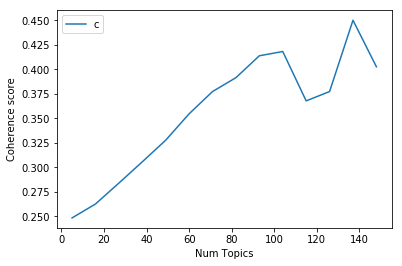

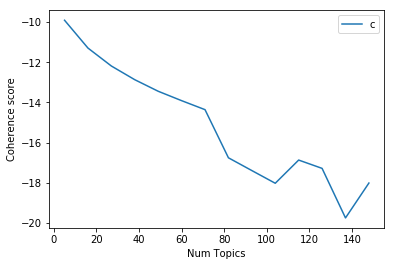

In [11]:
#model_list, coherence_values,perplexity = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=tweets, start=5, limit=150, step=11)
# Show graph
import matplotlib.pyplot as plt
limit=150; start=5; step=11;
x = range(start, limit, step)
plt.plot(x, coherence_values)
#plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
ldamodel1 = gensim.models.ldamulticore.LdaMulticore(corpus_tfidf, num_topics=100, id2word = dictionary, workers=3)
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel1, corpus_tfidf, dictionary)
vis

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
61     1.388337        1       1 -0.046118 -0.040240
6      1.362012        1       2 -0.005812 -0.060701
28     1.330362        1       3 -0.046065 -0.036701
26     1.305345        1       4 -0.039927 -0.021533
15     1.293774        1       5 -0.009111 -0.076439
78     1.233181        1       6  0.106216 -0.013588
9      1.213287        1       7 -0.007669 -0.041692
37     1.188507        1       8  0.062556  0.022804
38     1.186705        1       9 -0.003422 -0.042715
49     1.150082        1      10 -0.046537 -0.046581
74     1.148812        1      11  0.020620 -0.036920
32     1.147464        1      12 -0.005387 -0.029597
54     1.143520        1      13  0.058569 -0.042514
96     1.142016        1      14  0.003265 -0.028685
7      1.136494        1      15 -0.003619 -0.071541
21     1.136130        1      16  0.077151 -0.014680
31     1.121145        1      17  0.001062 -0.038911
51     1.120810        1      18 -0.048051 -0.031038
81     1.114142        1      19 -0.013924 -0.030794
12     1.113048        1      20 -0.014334 -0.030360
3      1.106922        1      21 -0.015175 -0.034778
89     1.103608        1      22  0.091705  0.011510
56     1.102630        1      23  0.016936 -0.019183
46     1.095070        1      24 -0.021053 -0.046019
42     1.093982        1      25 -0.025362 -0.007139
90     1.086016        1      26  0.082641 -0.028411
35     1.083001        1      27 -0.046736 -0.025131
72     1.078830        1      28  0.004387 -0.039680
53     1.074094        1      29  0.064302  0.017195
95     1.071745        1      30 -0.030627 -0.041724
...         ...      ...     ...       ...       ...
83     0.915263        1      71  0.004223  0.000527
34     0.910253        1      72  0.018216  0.017960
45     0.900929        1      73  0.008731  0.004144
76     0.898665        1      74 -0.023029 -0.039599
5      0.893063        1      75 -0.010626  0.010319
86     0.890857        1      76 -0.031052  0.032034
99     0.888359        1      77  0.018279  0.071608
11     0.883501        1      78 -0.028232  0.020078
4      0.881384        1      79  0.009803  0.012428
60     0.880061        1      80  0.039454 -0.000927
14     0.876466        1      81  0.013633  0.037240
80     0.866112        1      82 -0.017616  0.016436
0      0.865581        1      83 -0.025081  0.036491
10     0.862997        1      84  0.016714  0.000734
22     0.861664        1      85 -0.018533  0.006906
68     0.859592        1      86 -0.021338  0.008386
98     0.853149        1      87 -0.027198  0.041202
85     0.851690        1      88  0.001441  0.003167
84     0.850641        1      89  0.033915  0.010997
44     0.849622        1      90 -0.034152  0.041811
77     0.845686        1      91 -0.007335 -0.006726
17     0.843660        1      92  0.003688 -0.012515
71     0.832560        1      93 -0.029918  0.021591
64     0.818694        1      94 -0.011728  0.018532
16     0.816677        1      95 -0.022133  0.039219
59     0.813311        1      96  0.044121  0.032688
36     0.811406        1      97  0.069818  0.034639
43     0.803443        1      98 -0.027448  0.050429
24     0.791269        1      99 -0.003140  0.040673
52     0.781384        1     100 -0.001325  0.021400

[100 rows x 5 columns], topic_info=      Category        Freq           Term       Total  loglift  logprob
term                                                                   
117    Default   46.000000          donat   46.000000  30.0000  30.0000
118    Default   57.000000          doral   57.000000  29.0000  29.0000
116    Default   52.000000        channel   52.000000  28.0000  28.0000
3164   Default   85.000000           knot   85.000000  27.0000  27.0000
697    Default   28.000000           luci   28.000000  26.0000  26.0000
3162   Default   89.000000            aso   89.000000  25.0000  25.0000
191    Default   3

In [12]:
ldamodel1.show_topics(num_topics=100)

[(0,
  '0.007*"amp" + 0.007*"made" + 0.006*"face" + 0.006*"florida" + 0.005*"idiot" + 0.005*"treat" + 0.005*"home" + 0.005*"take" + 0.005*"bouta" + 0.005*"right"'),
 (1,
  '0.006*"place" + 0.006*"irma" + 0.006*"favorit" + 0.005*"pray" + 0.005*"hurricaneirma" + 0.005*"florida" + 0.005*"disney" + 0.005*"see" + 0.004*"hurrican" + 0.004*"chanc"'),
 (2,
  '0.011*"street" + 0.008*"fantasi" + 0.007*"car" + 0.005*"irma" + 0.005*"pick" + 0.005*"fall" + 0.005*"tree" + 0.005*"buy" + 0.005*"see" + 0.005*"hurricaneirma"'),
 (3,
  '0.008*"hurrican" + 0.007*"florida" + 0.007*"irma" + 0.007*"tallahasse" + 0.006*"entir" + 0.005*"hurricaneirma" + 0.005*"liter" + 0.005*"jacksonvill" + 0.004*"wait" + 0.004*"wind"'),
 (4,
  '0.006*"hurrican" + 0.006*"irma" + 0.006*"fuck" + 0.006*"florida" + 0.004*"forc" + 0.004*"hurricaneirma" + 0.004*"power" + 0.004*"confus" + 0.004*"aka" + 0.004*"photo"'),
 (5,
  '0.008*"hurrican" + 0.007*"irma" + 0.007*"internet" + 0.006*"peopl" + 0.005*"get" + 0.005*"florida" + 0.005*"

In [19]:
from gensim.models import HdpModel
hdp = HdpModel(corpus_tfidf, dictionary)

In [22]:
hdp.print_topics(num_topics=300, num_words=10)

[(0,
  '0.001*ncaaf + 0.000*maxxxxxxx + 0.000*steelcurtain + 0.000*pamonshaw + 0.000*poor + 0.000*walked + 0.000*miamishores + 0.000*bottomed + 0.000*mob + 0.000*rmdrake'),
 (1,
  '0.001*broken + 0.000*learning + 0.000*duration + 0.000*rileybutler3 + 0.000*costumer + 0.000*insecurehbo + 0.000*kiddo + 0.000*suncoast + 0.000*crave + 0.000*1825'),
 (2,
  '0.001*joegibbsracing + 0.000*inefficiency + 0.000*showmewhatyougot + 0.000*fake + 0.000*expact + 0.000*liquor + 0.000*mission + 0.000*pacificoclub + 0.000*123connorpoop + 0.000*8nfront'),
 (3,
  '0.000*quayside + 0.000*royal + 0.000*0731z + 0.000*plp + 0.000*dreamed + 0.000*hookandtackle + 0.000*wifisfuneral + 0.000*0851z + 0.000*canceled + 0.000*samkalidi'),
 (4,
  '0.001*obe + 0.000*neutral + 0.000*glomper + 0.000*acceptable + 0.000*learn + 0.000*healthcare + 0.000*chicken + 0.000*dish + 0.000*560wqam + 0.000*isitoveryet'),
 (5,
  '0.000*pip + 0.000*1843z + 0.000*indicator + 0.000*interstate + 0.000*nightcap + 0.000*hsvb + 0.000*homesi

In [13]:
lda_len=[]
docTopicProbMat = ldamodel1[corpus_tfidf]
for doc in docTopicProbMat:
    lda_len.append(len(doc))
df['lda_len']=lda_len

lda_vectors=[]
docTopicProbMat = ldamodel1[corpus_tfidf]
for doc in docTopicProbMat:
    lda_vectors.append((doc))
df['lda_vectors']=lda_vectors

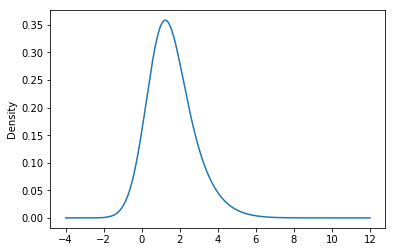

In [14]:
import matplotlib.pyplot as plt
ax = df['lda_len'].plot.kde(bw_method=1)
plt.show()

In [36]:
df[df['lda_len']==0]

,Unnamed: 0,timestamp,tweet_id,tweet,irma_rel,user_id,tweet_coords,tweet_coords_list,tweet_long,tweet_lat,location,enc_url,tweet_lang,hashtags,t,len,tf_idf_vectors,lda_len,lda_vectors
15793,15793,2017-09-10 20:46:53,906982331008811009,@i7solar Oh gotcha,0,1506827526,,"[[[-80.185106, 25.936226], [-80.185106, 25.974...",-80.1661,25.9553,Ojus,,en,,"[i7solar, oh, gotcha]",3,"[(14991, 0.707106781187), (14992, 0.7071067811...",0,[]
17786,17786,2017-09-10 22:50:36,907013466430611456,@49ersfangirl ah Tracy,0,2709112969,,"[[[-80.244338, 26.195412], [-80.244338, 26.230...",-80.2199,26.2128,North Lauderdale,,en,,"[49ersfangirl, ah, traci]",3,"[(16123, 0.707106781187), (16124, 0.7071067811...",0,[]
18065,18065,2017-09-10 23:07:23,907017690174423040,Nodell Beckham Jr.,0,80080749,,"[[[-81.865314, 30.138094], [-81.865314, 30.189...",-81.8216,30.1636,Oakleaf Plantation,,en,,"[nodel, beckham, jr]",3,"[(16286, 0.707106781187), (16287, 0.7071067811...",0,[]
18491,18491,2017-09-10 23:31:35,907023779485896705,The Loooonnggg waaay Baaby https://t.co/LjvGtD...,0,2206696679,,"[[[-82.410125, 27.965019], [-82.410125, 28.031...",-82.3683,27.9981,East Lake-Orient Park,,en,,"[loooonnggg, waaay, baabi]",3,"[(16545, 0.57735026919), (16546, 0.57735026919...",0,[]


In [ ]:
df['top_tdf_vectors']=""
for index, columns in df.iterrows():
    df['top_tdf_vectors'][index]=sorted(df['tf_vector'][index], key=lambda t: t[1], reverse=True)[:14]

In [20]:
data,col,row = [],[],[]
for i, rr in enumerate(lda_vectors):
          for cc in rr:
              row.append(i)
              col.append(cc[0])
              data.append(cc[1])
lda_sparse=sparse.coo_matrix((data,(row,col)),shape=(17213,100))

In [23]:
print(lda_sparse)

  (0, 41)	0.16559
  (0, 99)	0.602199
  (1, 9)	0.715531
  (2, 21)	0.322887
  (2, 60)	0.416312
  (3, 35)	0.718162
  (4, 35)	0.706694
  (5, 51)	0.704288
  (6, 39)	0.361134
  (6, 83)	0.436122
  (7, 41)	0.214076
  (7, 80)	0.556032
  (8, 9)	0.73448
  (9, 57)	0.637105
  (10, 23)	0.757165
  (11, 41)	0.717462
  (12, 70)	0.292759
  (12, 81)	0.395423
  (13, 34)	0.588007
  (14, 84)	0.625461
  (15, 10)	0.718409
  (16, 26)	0.401947
  (16, 91)	0.284956
  (17, 86)	0.679918
  (18, 6)	0.693783
  :	:
  (17200, 83)	0.195959
  (17201, 36)	0.268903
  (17201, 74)	0.261742
  (17201, 83)	0.200577
  (17202, 41)	0.576424
  (17202, 78)	0.131692
  (17203, 17)	0.390204
  (17204, 51)	0.633853
  (17205, 1)	0.201033
  (17205, 48)	0.354493
  (17206, 26)	0.401532
  (17206, 52)	0.239353
  (17207, 33)	0.478985
  (17207, 74)	0.100881
  (17207, 84)	0.138532
  (17208, 33)	0.627017
  (17209, 63)	0.34744
  (17210, 19)	0.298434
  (17210, 21)	0.200803
  (17210, 58)	0.175377
  (17211, 69)	0.313804
  (17211, 94)	0.184014
  (17211,

In [35]:
df['lda_vectors'][0]

[(41, 0.16559008), (99, 0.60219938)]

In [26]:
df.shape

(17213, 19)

In [34]:
lda_sparse.A[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.16559008,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [37]:
df.tail()

,Unnamed: 0,timestamp,tweet_id,tweet,irma_rel,user_id,tweet_coords,tweet_coords_list,tweet_long,tweet_lat,location,enc_url,tweet_lang,hashtags,t,len,tf_idf_vectors,lda_len,lda_vectors
19083,19083,2017-09-10 23:59:47,907030877456224256,SPRINT FUCKING SUCKS :,0,2743185538,,"[[[-80.186806, 25.778368], [-80.186806, 25.778...",-80.1868,25.7784,Bayside Marketplace,,en,,"[sprint, fuck, suck]",3,"[(640, 0.362980387354), (821, 0.514266641987),...",1,"[(33, 0.627017)]"
19084,19084,2017-09-10 23:59:48,907030881134632960,After this hurricane I m getting yatted,1,377673854,,"[[[-80.283913, 27.21782], [-80.283913, 27.2638...",-80.2469,27.2408,Jensen Beach,,en,,"[hurrican, get, yat]",3,"[(30, 0.287464592091), (70, 0.229636755176), (...",1,"[(63, 0.34744)]"
19085,19085,2017-09-10 23:59:53,907030900046745607,The @MiamiHerald and @WLRN took in us @NPR too...,0,250211424,,"[[[-80.41729, 25.780974], [-80.41729, 25.87031...",-80.3692,25.8256,Doral,,en,,"[miamiherald, wlrn, took, u, npr]",5,"[(1968, 0.386133938805), (7562, 0.506251923637...",3,"[(19, 0.298434), (21, 0.200803), (58, 0.175377)]"
19086,19086,2017-09-10 23:59:55,907030910511587329,Be safe out there Orlando. Irma has gone to No...,1,3001636069,,"[[[-81.423995, 28.582063], [-81.423995, 28.617...",-81.3952,28.5998,Fairview Shores,,en,,"[safe, orlando, irma, ha, gone, north, last, 5...",14,"[(22, 0.24437917811), (99, 0.192699954399), (1...",3,"[(69, 0.313804), (94, 0.184014), (95, 0.27792)]"
19087,19087,2017-09-10 23:59:55,907030911597912064,Watching The One With the Blackout bc its cl...,1,2277612124,,"[[[-82.14301, 28.653914], [-82.14301, 28.68321...",-82.1208,28.6686,Bushnell,,en,"FRIENDS,HuricaneIrma","[watch, one, blackout, bc, close, enough, frie...",8,"[(114, 0.387832047085), (126, 0.261433659577),...",2,"[(31, 0.333807), (74, 0.387641)]"


In [38]:
y=df.irma_rel
X=lda_sparse
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2,test_size=0.2)
print(Xtrain.shape, ytrain.shape)

(13770, 100) (13770,)


C:\Users\Mouna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(Xtrain,ytrain)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm_pred = clf.predict(Xtest)
print ("\n Confusion matrix \n", confusion_matrix(ytest, svm_pred))
print("\nClassification Report :: \n", classification_report(ytest, svm_pred))
print("Accuracy",accuracy_score(ytest, svm_pred))


 Confusion matrix 
 [[1302  515]
 [1006  620]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.56      0.72      0.63      1817
          1       0.55      0.38      0.45      1626

avg / total       0.56      0.56      0.55      3443

Accuracy 0.55823409817


In [40]:
print(Xtrain.shape, ytrain.shape)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(Xtrain,ytrain)
y_pred = rf.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print ("\n Confusion matrix \n", confusion_matrix(ytest, y_pred))
print("\nClassification Report :: \n", classification_report(ytest, y_pred))
print("Accuracy ",accuracy_score(ytest, y_pred))

(13770, 100) (13770,)

 Confusion matrix 
 [[1135  682]
 [ 764  862]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.60      0.62      0.61      1817
          1       0.56      0.53      0.54      1626

avg / total       0.58      0.58      0.58      3443

Accuracy  0.580017426663


In [41]:
from xgboost import XGBClassifier
trained_model = XGBClassifier(n_estimators=50, learning_rate=0.3)
trained_model.fit(Xtrain,ytrain)
predictions = trained_model.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print ("\n Confusion matrix \n", confusion_matrix(ytest, predictions))
print("\nClassification Report :: \n", classification_report(ytest, predictions))
print("Accuracy",accuracy_score(ytest, predictions))


 Confusion matrix 
 [[1499  318]
 [1085  541]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.58      0.82      0.68      1817
          1       0.63      0.33      0.44      1626

avg / total       0.60      0.59      0.57      3443

Accuracy 0.592506534999
